In [3]:
%matplotlib notebook
# %matplotlib inline
%load_ext autoreload
%autoreload 2

#
import numpy as np
import scipy.constants as const
pi, k, e, h, phi0 = const.pi, const.k, const.e, const.h, const.physical_constants['magn. flux quantum'][0]
import pandas as pd
pd.set_option("display.precision", 3)
import matplotlib.pyplot as plt
plt.close('all')

In [1]:
from mpl_toolkits import mplot3d
def viewGraph (ax, view = '45'):
    import operator
    ops = { "+": operator.add, "-": operator.sub } # etc.
    ax.view_init(15, 45)
    if view[1] == 't':
        ax.view_init(0, ops[view[0]](90,90))
    elif view[1] == 'r':
        ax.view_init(0,  ops[view[0]](0,1)*-90)
    elif view[1] == 'e':
        ax.view_init(90, ops[view[0]](90,90))

<IPython.core.display.Javascript object>


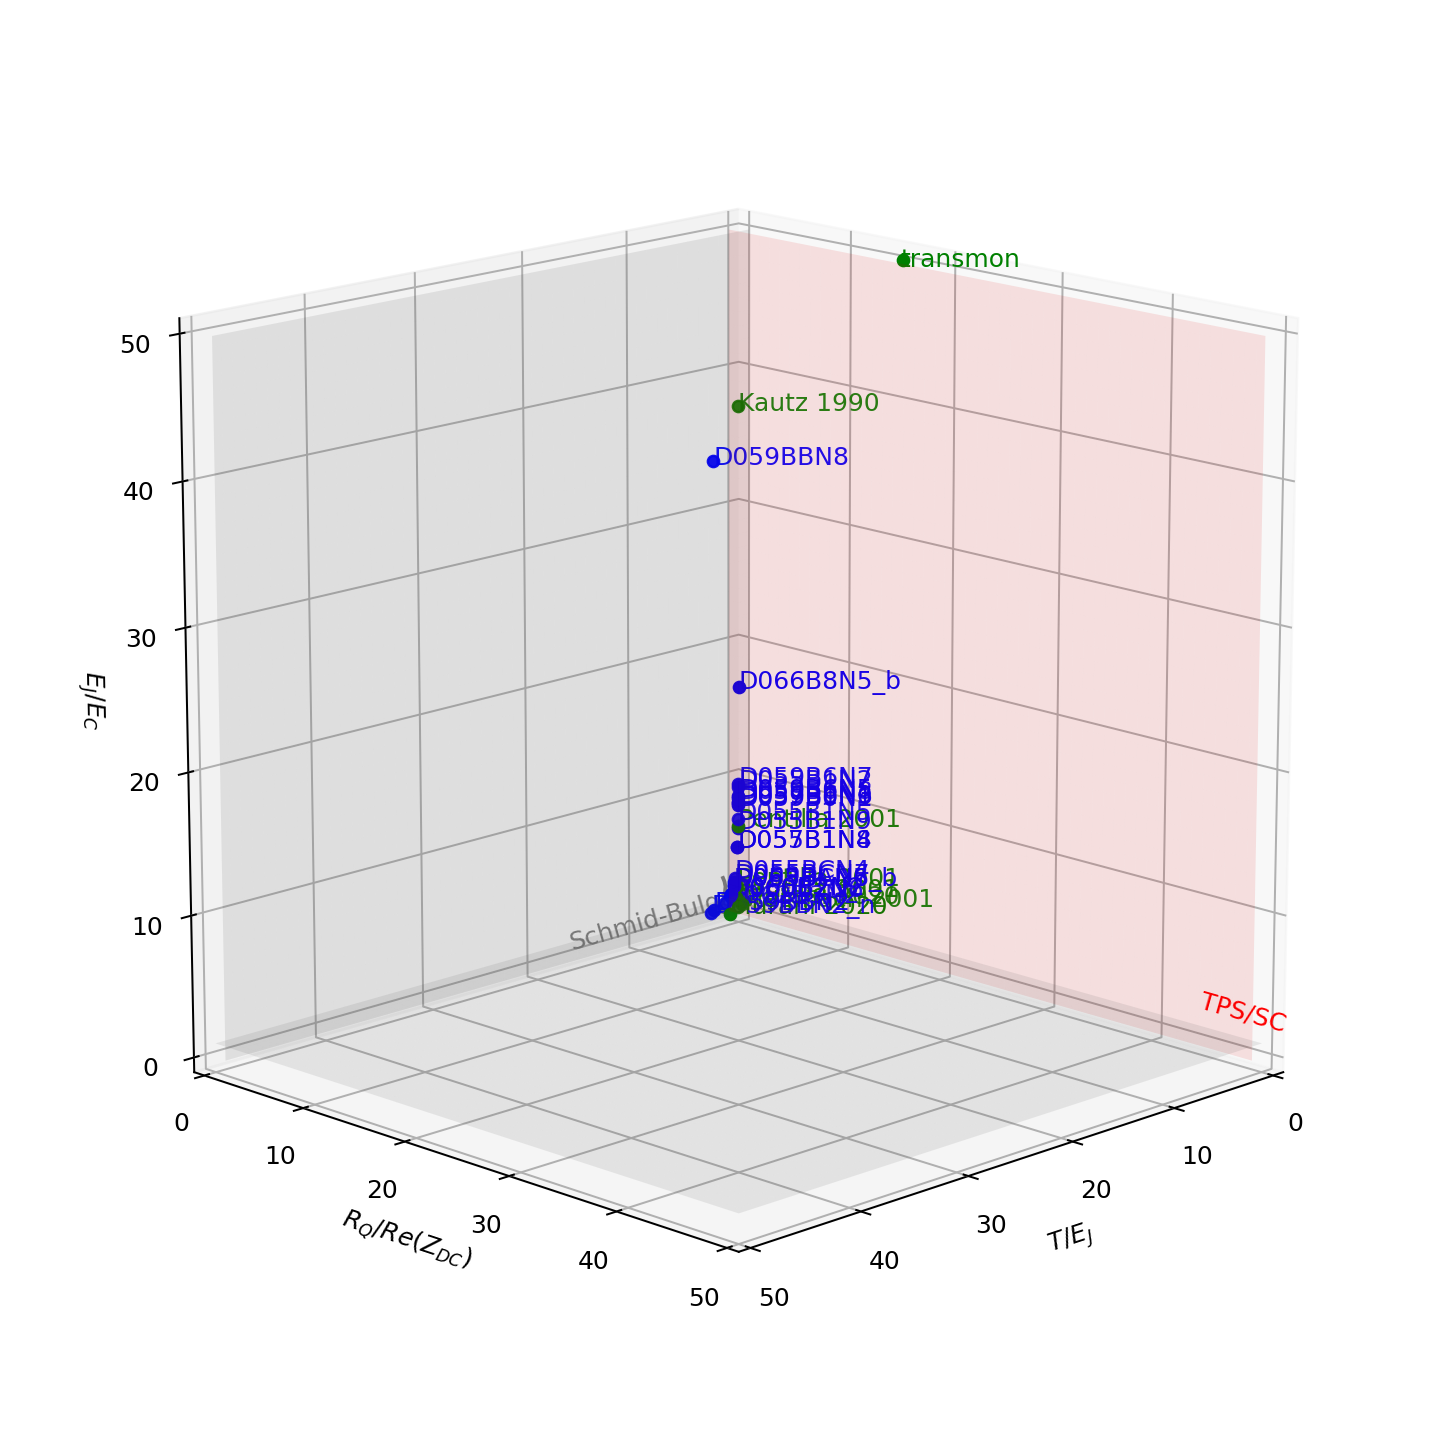

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in double_scalars


In [7]:
RQ = h/const.e**2/4
BT = 20e-3

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
surfaceMesh = 200
spaceScaling = 50
a = 0.1

#=============BOUNDARIES=============#
# Schmid-Bulgadaev phase diagram
fac = 1
t = np.outer(np.linspace(0, spaceScaling, surfaceMesh), np.ones(surfaceMesh))
r = np.outer(np.ones(surfaceMesh), np.ones(surfaceMesh))*fac
e = t.copy().T
ax.plot_surface(t, r, e, color = 'gray', alpha=0.1)
ax.text(20*0.9, fac*0.9, 1*0.9, "Schmid-Bulgadaev", zdir='x', color='gray')
t = np.outer(np.linspace(0, spaceScaling, surfaceMesh), np.ones(surfaceMesh))
e = np.outer(np.ones(surfaceMesh), np.ones(surfaceMesh))*fac
r = t.copy().T
ax.plot_surface(t, r, e, color = 'gray', alpha=0.1)

# Phase slips
fac = 1
t = np.outer(np.ones(surfaceMesh), np.ones(surfaceMesh))*fac
r = np.outer(np.linspace(0, spaceScaling, surfaceMesh), np.ones(surfaceMesh))
e = r.copy().T
ax.plot_surface(t, r, e, color = 'red', alpha=0.1)
ax.text(fac*0.9, spaceScaling*0.9, 1*0.9, "TPS/SC", zdir='y', color='red')

# Typical transmon
EJ, Z, EJoEC = 603e-3, 403, 50
t, r, e = BT/EJ, RQ/Z, EJoEC
ax.scatter3D(t,r,e,color='green')
ax.text(t*0.99, r*0.99, e*0.99, "transmon", color='green')

#==========LITERATURE STUDY==========#
# EJ, Z, EC = 1.06, 100, 0.2
# t, r, e = BT/EJ, RQ/Z, EJ/EC
# alpha = np.random.rand(1)[0]*a+(1-a)
# ax.scatter3D(t,r,e,color='green', alpha = alpha)
# ax.text(t*0.99, r*0.99, e*0.99, "Shimada 2016", color='green', alpha = alpha)

# EJ, Z, EC = 0.83, 100e3, 0.27
# t, r, e = BT/EJ, RQ/Z, EJ/EC
# alpha = np.random.rand(1)[0]*a+(1-a)
# ax.scatter3D(t,r,e,color='green', alpha = alpha)
# ax.text(t*0.99, r*0.99, e*0.99, "Haviland 2001", color='green', alpha = alpha)

df = pd.read_csv('exp summary.csv')

BT=200e-3
for i in range(df.shape[0]):
    EJ, Z, EC, name = df.iloc[i]['EJ, K'], df.iloc[i]['Z'], df.iloc[i]['EC(QP), K'], df.iloc[i]['reference']
    if EJ/EC<200:
        t, r, e = BT/EJ, RQ/Z, EJ/EC
        alpha = np.random.rand(1)[0]*a+(1-a)
        ax.scatter3D(t,r,e,color='green', alpha = alpha)
        ax.text(t*0.99, r*0.99, e*0.99, name, color='green', alpha = alpha)
BT = 20e-3

ax.set_xlabel('$T/E_J$')
ax.set_ylabel('$R_Q/Re(Z_{DC})$')
ax.set_zlabel('$E_J/E_C$')

#============OUR DEVICE=============#
df = pd.read_csv('chain table.csv')

BT=200e-3
for i in range(df.shape[0]):
    EJ, Z, EC, name = df.iloc[i]['Ej'], 100e3, df.iloc[i]['Ec'], df.iloc[i]['dev']
    if EJ/EC<200:
        t, r, e = BT/EJ, RQ/Z, EJ/EC
        alpha = np.random.rand(1)[0]*a+(1-a)
        ax.scatter3D(t,r,e,color='blue', alpha = alpha)
        ax.text(t*0.99, r*0.99, e*0.99, name, color='blue', alpha = alpha)
BT = 20e-3

ax.set_xlabel('$T/E_J$')
ax.set_ylabel('$R_Q/Re(Z_{DC})$')
ax.set_zlabel('$E_J/E_C$')

#====================================#
# Pinos' MBL prediction
Z = 1e9 # "Isolated from the environment"
T = np.asarray([    0,0.25,0.55,  1,1.5,   2,2.5,   3,3.5,3.75,3.7,3.35,3.1,2.95,2.8,2.75,2.7,2.8,2.9,3.2])
T = T/2
E = np.asarray([0.625,0.48,0.35,0.2,0.1,0.01,  0,0.01,0.1,0.25,0.5,0.75,  1, 1.2,1.5, 1.7,1.9,2.1,2.3,2.6])
R = np.ones(len(E))*RQ/Z
ax.plot3D(T, R, E, ls='-', color = 'gray')

ax.set_xlim(0,3)
ax.set_ylim(0,5)
ax.set_zlim(0,5)
# viewGraph(ax, '-r')
#====================================#

viewGraph(ax, '-0')
ax.set_xlim(0,50)
ax.set_ylim(0,50)
ax.set_zlim(0,50)

fig.tight_layout()